In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
BASEDIR = './data/train'

In [115]:
pheno_training = pd.read_csv(
    os.path.join(BASEDIR, 'pheno_training.csv')
)
pheno_training.iloc[0:5]

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_328,53.618,24.127,0.0,0,0.0,0.0,0.0,0.0,15.750,133.077,3.020,0
1,Simulated_1644,36.811,27.992,0.0,0,0.0,0.0,0.0,0.0,15.881,108.914,5.480,0
2,Simulated_1710,49.429,23.664,0.0,0,0.0,0.0,0.0,0.0,15.891,110.064,4.388,1
3,Simulated_1732,48.842,26.804,0.0,0,0.0,0.0,0.0,0.0,15.918,128.059,5.119,0
4,Simulated_1727,60.738,29.862,0.0,0,0.0,0.0,0.0,0.0,15.841,169.913,5.740,1


In [4]:
np.shape(pheno_training)

(3615, 13)

In [5]:
print(len(pheno_training['Unnamed: 0'].unique()))

3615


In [6]:
rc_training = pd.read_csv(
    os.path.join(BASEDIR, 'readcounts_training.csv')
)
rc_training.iloc[0:3]

,Unnamed: 0,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.shape(rc_training)

(5748, 3616)

In [8]:
rc_training_t = rc_training.T.reset_index()
rc_training_t.columns = rc_training_t.iloc[0]
rc_training_t = rc_training_t.drop(0).reset_index()
rc_training_t = rc_training_t.drop('index', axis=1)

In [9]:
rc_training_t.iloc[0:5]

,Unnamed: 0,k__Archaea;p__;c__;o__;f__;g__;s__,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Acidilobaceae;g__Acidilobus;s__Acidilobus_saccharovorans,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Caldisphaeraceae;g__Caldisphaera;s__Caldisphaera_lagunensis,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;s__Aeropyrum_camini,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_amylolyticus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_mucosus,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
0,Simulated_328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Simulated_1644,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Simulated_1710,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Simulated_1732,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,Simulated_1727,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
np.shape(rc_training_t)

(3615, 5749)

In [11]:
print(len(rc_training_t['Unnamed: 0'].unique()))

3615


In [12]:
taxtable = pd.read_csv(
    os.path.join(BASEDIR, 'taxtable.csv')
)
taxtable.iloc[0:3]

,Domain,Phylum,Class,Order,Family,Genus,Species,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,k__Archaea,p__,c__,o__,f__,g__,s__,NaN,NaN,NaN,NaN,NaN
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__,NaN,NaN,NaN,NaN,NaN
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__,NaN,NaN,NaN,NaN,NaN


## Imputing categorical integer values

In [116]:
cat_cols = ['Sex', 'Smoking', 'BPTreatment', 'PrevalentDiabetes', 'PrevalentCHD', 'PrevalentHFAIL']

for cols in cat_cols:
    mask = pheno_training[cols].isnull() 
    original = pheno_training[cols]
    residence_encoder = LabelEncoder()
    pheno_training[cols] = residence_encoder.fit_transform(pheno_training[cols])
    
    #if there is NaN values
    if mask.any():
        #adding NaN again
        pheno_training[cols] = pheno_training[cols].where(~mask, original) 
        
        imputer = KNNImputer(n_neighbors=3)
        pheno_training[cols]= imputer.fit_transform(pheno_training[cols].values.reshape(-1, 1))
    
    pheno_training[cols] = pd.Categorical(pheno_training[cols].astype(int))
 

In [117]:
pheno_training.dtypes

Unnamed: 0             object
Age                   float64
BodyMassIndex         float64
Smoking              category
BPTreatment          category
PrevalentDiabetes    category
PrevalentCHD         category
PrevalentHFAIL       category
Event                 float64
Event_time            float64
SystolicBP            float64
NonHDLcholesterol     float64
Sex                  category
dtype: object

## Imputing numeric  values

In [118]:
num_cols = ['Age', 'BodyMassIndex', 'Event_time', 'SystolicBP', 'NonHDLcholesterol']

for cols in num_cols:
    if pheno_training[cols].isnull().any():
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        pheno_training[cols] = imputer.fit_transform(pheno_training[cols].values.reshape(-1, 1))

## Removing rows with NaN for Event

In [119]:
#pheno_training[pheno_training['Event'].isna()]
indices = pheno_training['Event'].notna()
pheno_training_p = pheno_training[indices]
rc_training_t_p = rc_training_t[indices]
print(np.shape(pheno_training_p))
print(np.shape(rc_training_t_p))

(3564, 13)
(3564, 5749)


In [120]:
labels_HF = pd.Categorical(pheno_training_p['Event'].astype(int))

In [121]:
labels_HF

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 3564
Categories (2, int64): [0, 1]

## Columns with NaN categorical values

In [122]:
pheno_training_p[pheno_training_p.isna().any(axis=1)]

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex


## Concatenating all data

In [123]:
all_data = pd.concat([pheno_training_p.loc[:, pheno_training_p.columns != 'Event'], rc_training_t_p], axis=1).set_index('Unnamed: 0')
all_data.iloc[0:5]

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event_time,SystolicBP,NonHDLcholesterol,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"(Simulated_328, Simulated_328)",53.618,24.127,0,0,0,0,0,15.750,133.077,3.020,...,0,0,0,0,0,0,0,0,0,0
"(Simulated_1644, Simulated_1644)",36.811,27.992,0,0,0,0,0,15.881,108.914,5.480,...,0,0,0,0,0,0,0,0,0,0
"(Simulated_1710, Simulated_1710)",49.429,23.664,0,0,0,0,0,15.891,110.064,4.388,...,0,0,0,0,0,0,0,0,0,0
"(Simulated_1732, Simulated_1732)",48.842,26.804,0,0,0,0,0,15.918,128.059,5.119,...,0,2,0,0,0,0,0,0,0,0
"(Simulated_1727, Simulated_1727)",60.738,29.862,0,0,0,0,0,15.841,169.913,5.740,...,0,0,0,0,0,0,0,0,0,0


## PCA

In [148]:
col_names = all_data.columns.tolist()

In [175]:
x_train, x_test, y_train, y_test = train_test_split(all_data, labels_HF, test_size=0.20, random_state = 42)

In [185]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

#predictions = rfc.predict(x_test)

print(
    rfc.score(
        X=x_train,
        y=y_train
    ),
    rfc.score(
        X=x_test,
        y=y_test
    ),

)


1.0 0.9144460028050491


In [196]:
sorted_idx = rfc.feature_importances_.argsort().tolist()

k__Viruses;p__dsRNA_viruses;c__Reoviridae;o__;f__;g__;s__                                                                                        0.0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Morganellaceae;g__Moellerella;s__Moellerella_wisconsensis            0.0
k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__Muricauda;s__                                         0.0
k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__Maribacter;s__                                        0.0
k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__Mangrovimonas;s__                                     0.0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Pectobacteriaceae;g__Sodalis;s__Sodalis_glossinidius                 0.0
k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__Zobellia;s__   

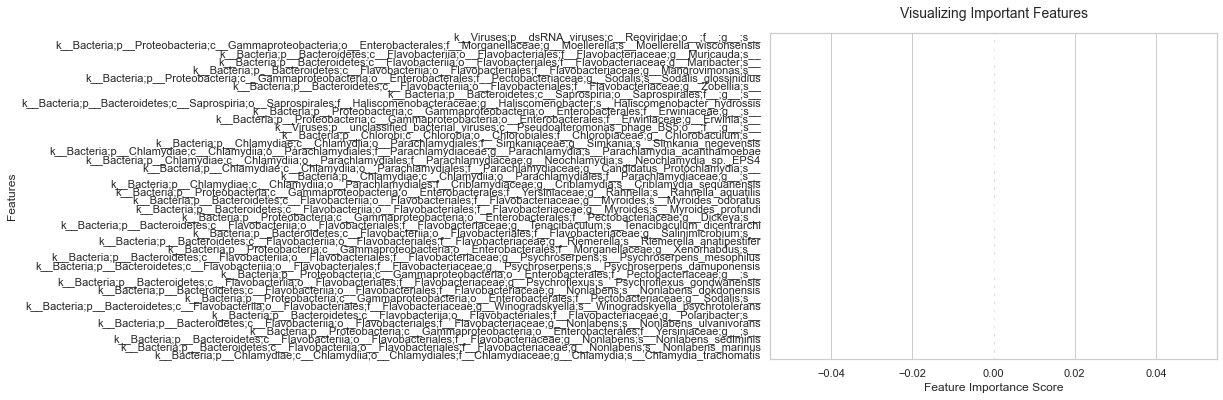

In [195]:
fig = plt.figure(figsize=(8, 6))
feat_imp = [rfc.feature_importances_[i] for i in sorted_idx[:40]]
cols = [col_names[i] for i in sorted_idx[:40]]
feature_imp = pd.Series(feat_imp, index=cols).sort_values(ascending=False)

print(feature_imp)

# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features", pad=15, size=14)
# plt.savefig('Barplot.png')

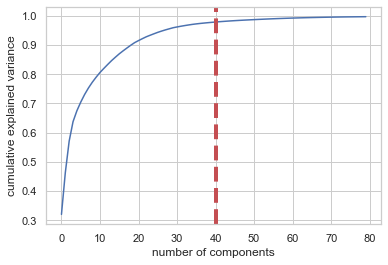

None

In [177]:
pca_test = PCA(n_components=80)
pca_test.fit(x_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=40, ymin=0, ymax=1)
display(plt.show())
# evr = pca_test.explained_variance_ratio_
# cvr = np.cumsum(pca_test.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(40))

In [182]:
pca = PCA(n_components=40)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [183]:
rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)

print(
    rfc.score(
        X=x_train_pca,
        y=y_train
    ),
    rfc.score(
        X=x_test_pca,
        y=y_test
    ),

)


1.0 0.9158485273492286
